In [6]:
import numpy as np

# Pre-processing: Create a corpus

In [1]:
my_corpus = ["python code", "c code", "hi there", "hi all"]
tokens = set(" ".join(my_corpus).split())  # Create a set of unique words from the corpus
tokens = sorted(tokens)  # Sort the tokens alphabetically
tokens  # Display the sorted list of tokens

['all', 'c', 'code', 'hi', 'python', 'there']

In [2]:
# Create a dictionary mapping each word to a unique index
word_to_idx = {word: idx for idx, word in enumerate(tokens)}
word_to_idx  # Display the word-to-index mapping

{'all': 0, 'c': 1, 'code': 2, 'hi': 3, 'python': 4, 'there': 5}

In [3]:
vocab_size = len(tokens)
vocab_size

6

# Hyperparameters

In [4]:
N = 2  # Size of the hidden layer
learning_rate = 0.01 # learning rate for the training
nof_epochs = 10000 # number of epochs for the training

# Initialize weights

In [7]:
W = np.random.rand(vocab_size, N) # input->hidden layer weights
W_prime = np.random.rand(N, vocab_size) # hidden->output layer weights

In [8]:
def one_hot_encode(word_idx, vocab_size):
    # Initialize a zero vector with the size of the vocabulary
    one_hot_vector = np.zeros(vocab_size)
    # Set the index corresponding to the word to 1
    one_hot_vector[word_idx] = 1
    # Return the one-hot encoded vector
    return one_hot_vector

In [9]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Stability improvement for softmax
    return e_x / e_x.sum(axis=0) # normalize the vector
    # return np.exp(x)/np.sum(np.exp(x))

# Training loop

In [10]:
loss_all = []  # List to store loss values for each epoch
for epoch in range(nof_epochs):  # Iterate over the number of epochs
    loss = 0  # Initialize loss for the current epoch
    for sentence in my_corpus:  # Iterate over each sentence in the corpus
        words = sentence.split()  # Split the sentence into words
        for i, target_word in enumerate(words):  # Iterate over each word in the sentence
            # Determine the context word based on the position of the target word
            if i == 1:
                context_word = words[0]  # Context is the previous word
            elif i == 0:
                context_word = words[1]  # Context is the next word
            else:
                context_word = None  # No context for other positions

            if context_word:  # Proceed if a context word is defined
                # One-hot encode the context word
                context_idx = word_to_idx[context_word]  # Get index of context word
                target_idx = word_to_idx[target_word]  # Get index of target word
                x = one_hot_encode(context_idx, vocab_size)  # One-hot encode context

                # Forward pass through the network
                h = W.T @ x  # Compute hidden layer activations
                u = W_prime.T @ h  # Compute output layer activations
                y_pred = softmax(u)  # Apply softmax to get predictions

                # Backpropagation to compute gradients
                e = y_pred.copy()  # Copy predictions to compute error
                e[target_idx] -= 1  # Subtract 1 from the true target index

                # Compute loss using negative log likelihood
                loss += -np.log(y_pred[target_idx] + 1e-8)  # Accumulate loss

                # Compute gradients for weight updates
                dW_prime = np.outer(h, e)  # Gradient for W_prime
                dW = np.outer(x, W_prime @ e)  # Gradient for W

                # Update weights using the computed gradients
                W_prime -= learning_rate * dW_prime  # Update W_prime
                W -= learning_rate * dW  # Update W

    loss_all.append(loss)  # Append the loss for the current epoch

    if epoch % 1000 == 0:  # Print loss every 1000 epochs
        print(f'Epoch: {epoch}, Loss: {loss:.4f}')  # Display epoch and loss

Epoch: 0, Loss: 14.0026
Epoch: 1000, Loss: 2.9249
Epoch: 2000, Loss: 2.8762
Epoch: 3000, Loss: 2.8651
Epoch: 4000, Loss: 2.8593
Epoch: 5000, Loss: 2.8551
Epoch: 6000, Loss: 2.8515
Epoch: 7000, Loss: 2.8484
Epoch: 8000, Loss: 2.8455
Epoch: 9000, Loss: 2.8429


# Display learned word vectors

In [11]:
# Iterate over each word and its corresponding index in the word_to_idx dictionary
for word, idx in word_to_idx.items():
    # Print the word and its associated vector from the weight matrix W
    print(f"Word: {word}, Vector: {W[idx]}")

Word: all, Vector: [1.08067102 2.55407626]
Word: c, Vector: [-2.20940986  1.18226026]
Word: code, Vector: [-0.96850276 -2.098627  ]
Word: hi, Vector: [ 2.38280615 -0.79618233]
Word: python, Vector: [-2.24707993  1.33620669]
Word: there, Vector: [1.07351968 2.55054334]


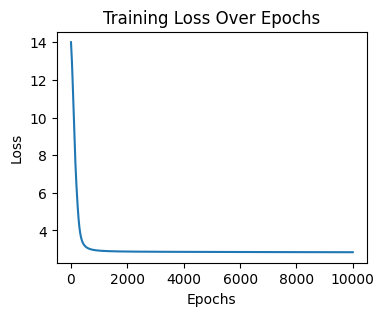

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3)) # set the size of the plot
plt.plot(loss_all) # plot the loss over the epochs
plt.xlabel('Epochs') # label the x-axis
plt.ylabel('Loss') # label the y-axis
plt.title('Training Loss Over Epochs') # title of the plot
plt.show() # show the plot

In [ ]:
for word in word_to_idx:
    print(word, word_to_idx[word]) # print the word and its index

In [ ]:
# Extract word vectors from the weight matrix W using the word indices
word_vectors = np.array([W[word_to_idx[word]] for word in word_to_idx])
# Display the word vectors
word_vectors

# Compute all-by-all similarities for the learned word vectors

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Calculate the cosine similarities between all pairs of word vectors
similarities = cosine_similarity(word_vectors)
# Display the similarity matrix
similarities

In [ ]:
# Plot the matrix
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with specified size
plt.figure(figsize=(10, 8))

# Plot a heatmap of the similarity matrix with word labels on both axes
sns.heatmap(similarities, xticklabels=word_to_idx.keys(), yticklabels=word_to_idx.keys(), cmap='binary', annot=True)

# Set the title of the plot
plt.title('Word Vector Similarities')

# Display the plot
plt.show()

In [17]:
# !pip install adjustText

In [ ]:
# 2D map of word_vectors
import matplotlib.pyplot as plt
from adjustText import adjust_text  # You'll need to: pip install adjustText

# Create a new figure with a specified size
plt.figure(figsize=(5, 4))

# Initialize a list to store text annotations
texts = []

# Iterate over each word and its corresponding 2D coordinates
for word, (x, y) in zip(word_to_idx.keys(), word_vectors):
    # Plot the word as a point on the scatter plot
    plt.scatter(x, y)
    # Add the word as a text annotation at its coordinates
    texts.append(plt.text(x, y, word, fontsize=12))

# Adjust the text annotations to avoid overlap, using arrows for clarity
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

# Set the title of the plot
plt.title('2D Map of Word Vectors')

# Label the x-axis
plt.xlabel('Dimension 1')

# Label the y-axis
plt.ylabel('Dimension 2')

# Enable the grid for better readability
plt.grid(True)

# Display the plot
plt.show()